In [27]:
!pip install scikit-learn

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [29]:
sonar_data=pd.read_csv("Copy of sonar data.csv")

In [74]:
sonar_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0.02,0.0453,0.0262,0.01,0.0762,0.0286,0.0317,0.0519,0.0223,0.0164,0.0039,...,0.0238,0.0116,0.0131,0.0335,0.0272,0.0187,0.0323,0.0522,0.0303,0.026
0.0371,0.0523,0.0582,0.0171,0.0666,0.0453,0.0956,0.0548,0.0375,0.0173,0.0063,...,0.0318,0.0744,0.0387,0.0258,0.0378,0.0346,0.0101,0.0437,0.0353,0.0363
0.0428,0.0843,0.1099,0.0623,0.0481,0.0277,0.1321,0.0842,0.0484,0.0347,0.0152,...,0.0422,0.0367,0.0329,0.0398,0.0488,0.0168,0.0298,0.018,0.049,0.0136
0.0207,0.0689,0.1083,0.0205,0.0394,0.0174,0.1408,0.0319,0.0475,0.007,0.0336,...,0.0399,0.0225,0.0078,0.057,0.0848,0.0177,0.0564,0.0292,0.0608,0.0272
0.0954,0.1183,0.0974,0.0205,0.059,0.0384,0.1674,0.1158,0.0647,0.0187,0.031,...,0.0788,0.0076,0.0721,0.0529,0.1127,0.0393,0.076,0.0351,0.0167,0.0214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.018,0.014,0.0316,0.005,0.0072,0.0057,0.0092,0.0085,0.0065,0.0032,0.0042,...,0.0028,0.0037,0.004,0.0045,0.0054,0.0065,0.0034,0.014,0.0034,0.004
0.0084,0.0049,0.0164,0.0044,0.0048,0.0027,0.0143,0.0047,0.0093,0.0035,0.0003,...,0.0013,0.0044,0.0009,0.0022,0.0051,0.0115,0.0032,0.0138,0.0079,0.0036
0.009,0.0052,0.0095,0.004,0.0107,0.0051,0.0036,0.0048,0.0059,0.0056,0.0053,...,0.0035,0.0057,0.0015,0.0005,0.0065,0.0193,0.0062,0.0077,0.0036,0.0061
0.0032,0.0044,0.0078,0.0117,0.0094,0.0062,0.0103,0.0053,0.0022,0.004,0.0036,...,0.006,0.0035,0.0085,0.0031,0.0103,0.0157,0.0067,0.0031,0.0048,0.0115


In [31]:
sonar_data.columns

Index(['0.02', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.066', '0.2273', '0.31', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.555', '0.6711', '0.6415', '0.7104', '0.808',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.051', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.018', '0.0084', '0.009', '0.0032', '60'],
      dtype='object')

In [32]:
sonar_data.describe()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [33]:
sonar_data.isnull().sum()

0.02      0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.018     0
0.0084    0
0.009     0
0.0032    0
60        0
Length: 61, dtype: int64

In [34]:
sonar_data.shape

(207, 61)

<AxesSubplot:>

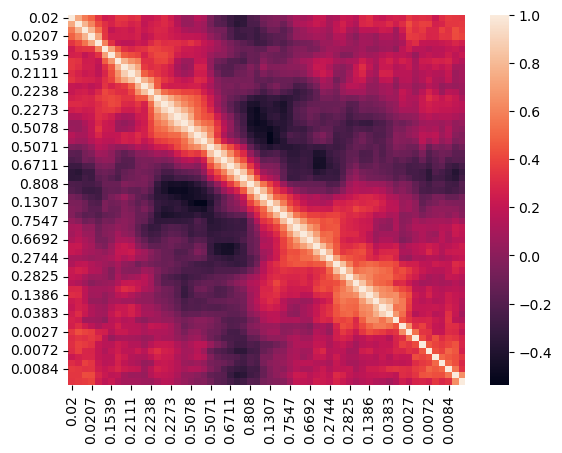

In [68]:
sns.heatmap(data=sonar_data.corr())

In [35]:
sonar_data["60"].value_counts()

M    111
R     96
Name: 60, dtype: int64

In [36]:
sonar_data.groupby("60").mean()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [37]:
X=sonar_data.drop(columns="60",axis=1)
Y=sonar_data["60"]

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=45)

In [39]:
model=LogisticRegression() 

In [40]:
model.fit(X_train,Y_train)

LogisticRegression()

In [41]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
Training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Model accuracy on training data",Training_data_accuracy)

Model accuracy on training data 0.8484848484848485


In [42]:
#accuracy on testing data
X_test_prediction=model.predict(X_test)
Testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Model accuracy on training data",Testing_data_accuracy)

Model accuracy on training data 0.8095238095238095


In [56]:
data=X_test.iloc[5]
print(Y_test.iloc[5])
input_array=np.asarray(data)
input_array_reshaped=input_array.reshape(1,-1)
print(input_array_reshaped.shape)
prediction=model.predict(input_array_reshaped)
if prediction=="R":
    print("IT IS A ROCK")
else:
    print("IT IS A MINE")  

R
(1, 60)
IT IS A ROCK


C:\Users\91910\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
from sklearn.metrics import confusion_matrix

In [61]:
prediction.shape

(1,)

In [64]:
confusion_matrix(Y_test,X_test_prediction)

array([[21,  2],
       [ 6, 13]], dtype=int64)